Plotting is an essentail component of data analysis that enables researchers to effectively communicate data insights through visualizations. Python has several powerful libraries for creating a wide range of figures. Matplotlib, renowned for its vast gallery and versatility, is ideal for creating static and publication-quality figures. Bokeh is another library that excels in interactive and web-ready visualizations, making it perfect for dynamic data exploration. Seaborn is a library that was built on top of Matplotlib, and specializes in statistical graphics and provides a more high-level interface for creating sophisticated plots.

## Dataset

To keep this plotting notebook simple, we will start by reading some daily environmental data recorded in a tallgrass prairie in the Kings Creek watershed, which is located within the Konza Prairie Biological Station near Manhattan, KS. The dataset includes the following variables:

| Variable Name  | Units           | Description                               | Sensor   |
|----------------|-----------------|-------------------------------------------|-----------
| datetime       | -               | Timestamp of the data record              |          |
| pressure       | kPa             | Atmospheric pressure                      | Atmos 41 |
| tmin           | °C              | Minimum temperature                       | Atmos 41 |
| tmax           | °C              | Maximum temperature                       | Atmos 41 |
| tavg           | °C              | Average temperature                       | Atmos 41 |
| rmin           | %               | Minimum relative humidity                 | Atmos 41 |
| rmax           | %               | Maximum relative humidity                 | Atmos 41 |
| prcp           | mm              | Precipitation amount                      | Atmos 41 |
| srad           | MJ/m²           | Solar radiation                           | Atmos 41 |
| wspd           | m/s             | Wind speed                                | Atmos 41 |
| wdir           | degrees         | Wind direction                            | Atmos 41 |
| vpd            | kPa             | Vapor pressure deficit                    | Atmos 41 |
| vwc_5cm        | m³/m³           | Volumetric water content at 5 cm depth    | Teros 12 |
| vwc_20cm       | m³/m³           | Volumetric water content at 20 cm depth   | Teros 12 |
| vwc_40cm       | m³/m³           | Volumetric water content at 40 cm depth   | Teros 12 |
| soiltemp_5cm   | °C              | Soil temperature at 5 cm depth            | Teros 12 |
| soiltemp_20cm  | °C              | Soil temperature at 20 cm depth           | Teros 12 |
| soiltemp_40cm  | °C              | Soil temperature at 40 cm depth           | Teros 12 |
| battv          | millivolts      | Battery voltage of the datalogger         |          |



In [142]:
# Import Numpy and Pandas modules
import numpy as np
import pandas as pd

# Read some tabulated weather data
df = pd.read_csv('../datasets/kings_creek_2022_2023_daily.csv', parse_dates=['datetime'])

# Display a few rows to inspect column headers and data
df.head(3)


,datetime,pressure,tmin,tmax,tavg,rmin,rmax,prcp,srad,wspd,wdir,vpd,vwc_5cm,vwc_20cm,vwc_40cm,soiltemp_5cm,soiltemp_20cm,soiltemp_40cm,battv
0,2022-01-01,96.837917,-14.8,-4.4,-9.6,78.475475,98.012496,0.0,2.09808,5.483333,0.968820,0.027500,0.256750,0.307,0.359000,2.995833,5.391667,7.425000,8714.833333
1,2022-01-02,97.994583,-20.4,-7.2,-13.8,50.543218,84.935503,0.0,9.75636,2.216250,2.023276,0.072500,0.256000,0.307,0.358292,2.562500,4.250000,6.691667,8890.041667
2,2022-01-03,97.843750,-9.4,8.8,-0.3,40.622240,82.662479,0.0,9.68076,2.749167,5.667358,0.261667,0.255167,0.307,0.358000,2.454167,3.916667,6.208333,8924.833333


## Matplotlib module

Matplotlib is a powerful and widely-used Python library for creating high-quality static and animated visualizations with a few lines of code that are suitable for scientific research. Matplotlib integrates well with other libraries like Numpy and Pandas, and can generate a wide range of graphs and has an extensive gallery of examples, so in this tutorial we will go over a few examples to learn the syntax, properties, and methods available to users in order to customize figures. To learn more visit [Matplotlib's official documentation](https://matplotlib.org/).

### Components of Matplotlib figures

::: {layout="[1]"}
![Components of a Matplotlib figure. Source:matplotlib.org](https://matplotlib.org/2.0.2/_images/anatomy.png)

:::

- **Figure**: The entire window that everything is drawn on. The top-level container for all the elements.
- **Axes**: The part of the figure where the data is plotted, including any axes labeling, ticks, and tick labels. It's the area that contains the plot elements.
- **Plotting area**: The space where the data points are visualized. It's contained within the axes.
- **Axis**: These are the line-like objects and take care of setting the graph limits and generating the ticks and tick labels.
- **Ticks and Tick Labels**: The marks on the axis to denote data points and the labels assigned to these ticks.
- **Labels**: Descriptive text added to the *x* axis and *y* axis to identify what each represents.
- **Title**: A text label placed at the top of the axes to provide a summary or comment about the plot.
- **Legend**: A small area describing the different elements or data series of the plot. It's used to identify plots represented by different colors, markers, or line styles.

Essentially, a Matplotlib figure is an assembly of interconnected objects, each customizable through various properties and functions. When a figure is created, attributes such as the figure dimensions, axes properties, tick marks, font size of labels, and more come with pre-set default values. Understanding this object hierarchy is key customize figures to your visualization needs.


### Matplotlib syntax

Matplotlib has two syntax styles or interfaces for creating figures:
    
1. **function-based interface (easy)** that resembles Matlab's plotting syntax. This interface relies on using the `plt.___<function>____` construction for adding/modifying each component of a figure. It is simpler and more straightforward that the object-based interface (see below), so the function-based style is sometimes easier for beginners or students with background in Matlab. The main disadvantage of this method is that is implicit, meaning that the axes object (with all its attributes and methods) remains temporarily in the background since we are not saving it into a variable. This means that if we want to add/remove/modify something later on in one axes, we don't have that object available to us to implement the changes. One option is to get the current axes using `plt.gca()`, but we need to do this before adding another axes (say another subplot) to the figure. If you don't need to create sophisticated figures, then this method usually works just fine.
    
2. **object-based interface (advanced)** that offers more flexibility and control, particularly when dealing with multiple axes. In this interface, the `figure` and `axes` objects are explicit, meaning that each figure and axes object are stored as regular variables that provide the programmer access to all configuration options at any point in the script. The downside is that this syntax is a bit more verbose and sometimes less intuitive to beginners compared tot he function-based approach. The official documentation typically favors the object-based syntax, so it is good to become familair with it.
    
But don't panic, the syntax between these two methods is not that different. Below I added more syntax details, a cheat sheet to help you understand some of the differences, and several examples using real data. In [this article](https://matplotlib.org/stable/users/explain/figure/api_interfaces.html) you can learn more about the pros and cons of each style.


#### Function-based syntax

```python
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# Create figure and plot
plt.figure(figsize=(4,4))
plt.plot(x, y)
plt.title("Simple Line Plot")
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()
```

#### Object-based syntax

```python
import matplotlib.pyplot as plt

# Sample data
x = [1, 2, 3, 4]
y = [10, 20, 25, 30]

# Create figure and axes
fig, ax = plt.subplots(figsize=(4,4))
ax.plot(x, y)
ax.set_title("Simple Line Plot")
ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
plt.show()
```

#### Matplotlib Cheat Sheet

| Operation | function-based syntax | object-based syntax |
|------|---------------------|-----------------------|
|**Create figure** | `plt.figure()` | `fig,ax = plt.subplots()`<br> `fig,ax = plt.subplots(1,1)`|
| **Simple line or scatter plot** | `plt.plot(x, y)`<br>`plt.scatter(x, y)` | `ax.plot(x, y)`<br>`ax.scatter(x, y)` |
| **Add axis labels** | `plt.xlabel('label', fontsize=size)`<br>`plt.ylabel('label', fontsize=size)` | `ax.set_xlabel('label', fontsize=size)`<br>`ax.set_ylabel('label', fontsize=size)` |
| **Change font size of tick marks** | `plt.xticks(fontsize=size)`<br>`plt.yticks(fontsize=size)` | `ax.tick_params(axis='both', labelsize=size)` |
| **Add a legend** | `plt.legend()` | `ax.legend()` |
| **Remove tick marks** | `plt.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)` | `ax.tick_params(axis='both', which='both', bottom=False, top=False, labelbottom=False)` |
| **Add a title** | `plt.title('title')` | `ax.set_title('title')` |
| **Add a secondary axis** | `plt.twinx()` | `ax_secondary = ax.twinx()` |
| **Rotate tick labels** | `plt.xticks(rotation=angle)`<br>`plt.yticks(rotation=angle)` | `ax.tick_params(axis='x', rotation=angle)`<br>`ax.tick_params(axis='y', rotation=angle)` |
| **Change scale** | `plt.xscale('log')`<br>`plt.yscale('log')` | `ax.set_xscale('log')`<br>`ax.set_yscale('log')` |
| **Change axis limits** | `plt.xlim([xmin, xmax])`<br>`plt.ylim([ymin, ymax])` | `ax.set_xlim([xmin, xmax])`<br>`ax.set_ylim([ymin, ymax])` |
| **Create subplots** | `plt.subplots(1, 2, 1)`<br>`plt.subplots(2, 2, 1)` | `fig, (ax1, ax2) = plt.subplots(1, 2)`<br>`fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)`<br>`fig, axs = plt.subplots(2, 2); axs[0, 0].plot(x, y)` |
|**Change xaxis dateformat** | `fmt = mdates.DateFormatter('%b-%y')` <br> `plt.gca().xaxis.set_major_formatter(fmt)` | `fmt = mdates.DateFormatter('%b-%y')` <br> `ax.xaxis.set_major_formatter(fmt)` |


In [35]:
# Import matplotlib modules
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


### Line plot

A common plot when working with meteorological data is to show maximum and minimum air temperature.

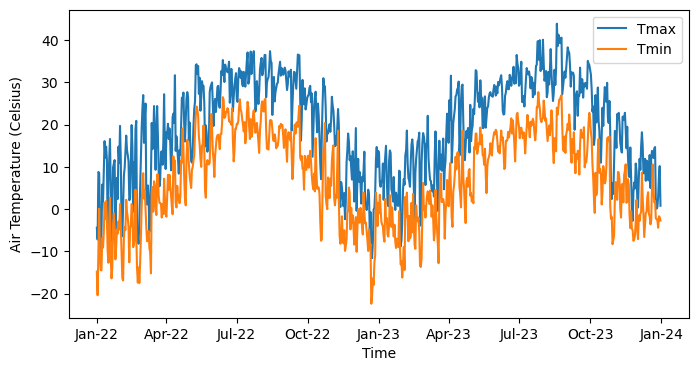

In [50]:
# Create figure
plt.figure(figsize=(8,4)) # If you set dpi=300 the figure is much better quality

# Add lines to axes
plt.plot(df['datetime'], df['tmax'], label='Tmax')
plt.plot(df['datetime'], df['tmin'], label='Tmin')

# Customize chart attributes
plt.xlabel('Time', fontsize=10)
plt.ylabel('Air Temperature (Celsius)', fontsize=10)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)

# Create custom dateformat for x-axis
date_format = mdates.DateFormatter('%b-%y')

# We don't have the axes object saved into a variable, so to set the date format 
# we need to get the current axes (gca).
# If we were adding more axes to this figure, then gca() will return the latest axes
plt.gca().xaxis.set_major_formatter(date_format)

# Save figure (check for more options in the Matplotlib's documentation)
plt.savefig('line_plot.jpg', dpi=300, facecolor='w',pad_inches=0.1) # Call before plt.show()
plt.show()


#### Object-based code
```python
fig, ax = plt.subplots(1,1,figsize=(8,4), dpi=300)
ax.plot(df['datetime'], df['tmax'], label='Tmax')
ax.plot(df['datetime'], df['tmin'], label='Tmin')
ax.set_xlabel('Time', fontsize=10)
ax.set_ylabel('Air Temperature (Celsius)', fontsize=10)
ax.tick_params(axis='both', labelsize=10)
ax.legend(fontsize=10)
date_format = mdates.DateFormatter('%b-%y')

# Here we have the axes object saved into the `ax` variable, so it is explicit and 
# we just need to access the method within the object. 
# We could do this step later, even if we create other axes with different variable names.
ax.xaxis.set_major_formatter(date_format) 

# Save figure
plt.savefig('line_plot.jpg', dpi=300, facecolor='w', pad_inches=0.1) # Call before plt.show()
plt.show()
```

### Scatter plot

Let's inspect soil temperature data a 5 and 40 cm depth and see how similar or different these two variables are. A 1:1 to line will serve as the reference of perfect equality.

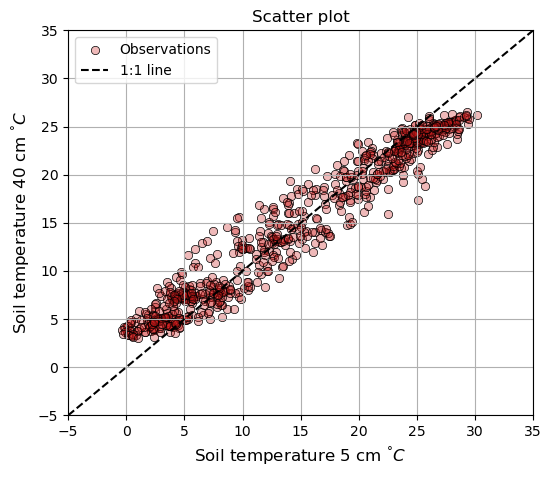

In [52]:
plt.figure(figsize=(6,5))
plt.scatter(df['soiltemp_5cm'], df['soiltemp_40cm'],
            marker='o', facecolor=(0.8, 0.1, 0.1, 0.3), 
            edgecolor='k', linewidth=0.5, label='Observations')
plt.plot([-5, 35], [-5, 35], linestyle='--', color='k', label='1:1 line') # 1:1 line
plt.title('Scatter plot', fontsize=12, fontweight='normal')
plt.xlabel('Soil temperature 5 cm $^\degree{C}$', size=12)
plt.ylabel('Soil temperature 40 cm $^\degree{C}$', size=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlim([-5, 35])
plt.ylim([-5, 35])
plt.legend(fontsize=10)
plt.grid()
plt.show()
           

#### Object-based syntax
```python
fig, ax = plt.subplots(1, 1, figsize=(6,5), edgecolor='k')
ax.scatter(df['soiltemp_5cm'], df['soiltemp_40cm'], 
           marker='o', facecolor=(0.8, 0.1, 0.1, 0.3),
           edgecolor='k', linewidth=0.5, label='Observations')
ax.plot([-5, 35], [-5, 35], linestyle='--', color='k', label='1:1 line')
ax.set_title('Scatter plot', fontsize=12, fontweight='normal')
ax.set_xlabel("Soil temperature 5 cm $^\degree{C}$", size=12)
ax.set_ylabel("Soil temperature 40 cm $^\degree{C}$", size=12)
ax.set_xlim([-5, 35])
ax.set_ylim([-5, 35])
ax.tick_params(axis='both', labelsize=12)
ax.grid(True)
plt.show()
```

### Histogram

One of the most common and useful charts to describe the distribution of a dataset is the histogram. 

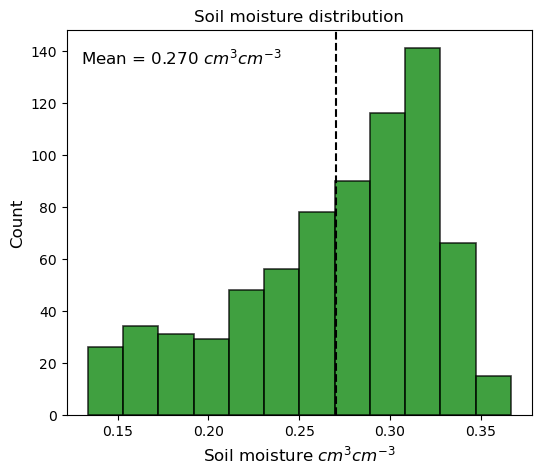

In [55]:
plt.figure(figsize=(6,5))
plt.hist(df['vwc_5cm'], bins='scott', density=False, 
         facecolor='g', alpha=0.75, edgecolor='black', linewidth=1.2)
plt.title('Soil moisture distribution', fontsize=12)
plt.xlabel('Soil moisture $cm^3 cm^{-3}$', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.text(0.13, 135, "Mean = " + f"{df['vwc_5cm'].mean():.3f}" + " $cm^3 cm^{-3}$", size=12)
plt.axvline(df['vwc_5cm'].mean(), linestyle='--', color='k')
plt.show()

#### Object-based syntax
```python
fig, ax = plt.subplots(figsize=(6,5))
ax.hist(df['vwc_5cm'], bins='scott', density=False, 
         facecolor='g', alpha=0.75, edgecolor='black', linewidth=1.2)

ax.text(0.13, 135, "Mean = " + f"{df['vwc_5cm'].mean():.3f}" + " $cm^3 cm^{-3}$", size=12)
ax.set_xlabel('Volumetric water content $cm^3 cm^{-3}$', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.tick_params('both', labelsize=12)
ax.set_title('Soil moisture distribution', fontsize=12)
ax.axvline(df['vwc_5cm'].mean(), linestyle='--', color='k')
plt.show()
```

### Subplots

In fields like agronomy, environmental science, hydrology, and meteorology sometimes we want to show multiple variables in one figure, but in different charts. Other times we want to show the same variable, but in separate charts for different locations or sites. In Matplotlib we can achieve this using subplots.

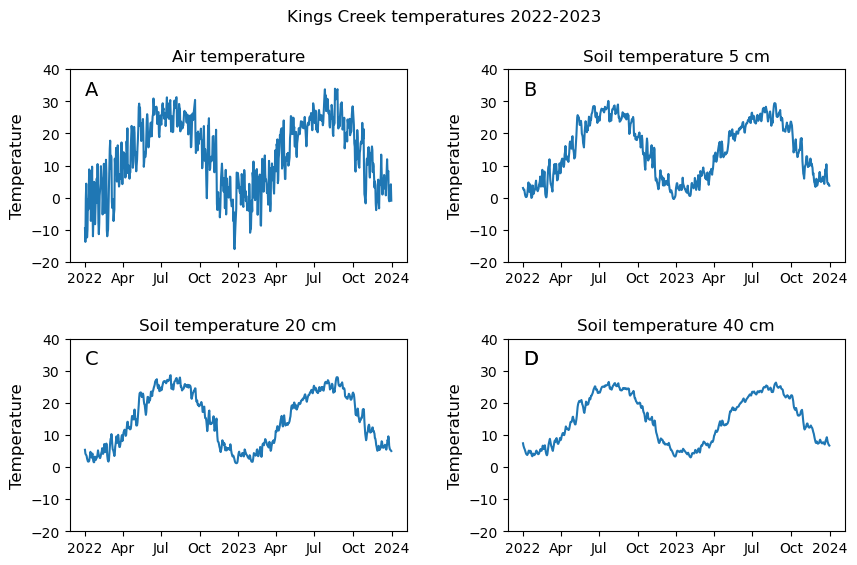

In [79]:
# Define date format
date_format = mdates.ConciseDateFormatter(ax.xaxis.get_major_locator())

# Create figure
plt.figure(figsize=(10,6))

# Set width and height spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Add superior title for entire figure
plt.suptitle('Kings Creek temperatures 2022-2023')

# Subplot 1 of 4
plt.subplot(2, 2, 1)
plt.plot(df["datetime"], df["tavg"])
plt.title('Air temperature', fontsize=12)
plt.ylabel('Temperature', fontsize=12)
plt.ylim([-20, 40])
plt.gca().xaxis.set_major_formatter(date_format)
plt.text( df['datetime'].iloc[0], 32, 'A', fontsize=14)

# Subplot 2 of 4
plt.subplot(2, 2, 2)
plt.plot(df["datetime"], df["soiltemp_5cm"])
plt.title('Soil temperature 5 cm', size=12)
plt.ylabel('Temperature', size=12)
plt.ylim([-20, 40])
plt.gca().xaxis.set_major_formatter(date_format)
plt.text( df['datetime'].iloc[0], 32, 'B', fontsize=14)

# Subplot 3 of 4
plt.subplot(2, 2, 3)
plt.plot(df["datetime"], df["soiltemp_20cm"])
plt.title('Soil temperature 20 cm', size=12)
plt.ylabel('Temperature', size=12)
plt.ylim([-20, 40])
plt.gca().xaxis.set_major_formatter(date_format)
plt.text( df['datetime'].iloc[0], 32, 'C', fontsize=14)

# Subplot 4 of 4
plt.subplot(2, 2, 4)
plt.text( df['datetime'].iloc[0], 32, 'D', fontsize=14)
plt.plot(df["datetime"], df["soiltemp_40cm"])
plt.title('Soil temperature 40 cm', size=12)
plt.ylabel('Temperature', size=12)
plt.ylim([-20, 40])
plt.gca().xaxis.set_major_formatter(date_format)
plt.text( df['datetime'].iloc[0], 32, 'D', fontsize=14)

plt.show()


#### Object-based syntax
```python

# Define date format
date_format = mdates.ConciseDateFormatter(ax.xaxis.get_major_locator())

# Create figure
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,6))

# Set width and height spacing between subplots
fig.subplots_adjust(wspace=0.3, hspace=0.4)

# Add superior title for entire figure
fig.suptitle('Kings Creek temperatures 2022-2023')

ax1.set_title('Air temperature', size=12)
ax1.set_ylabel('Temperature', size=12)
ax1.set_ylim([-20, 40])
ax1.xaxis.set_major_formatter(date_format)
ax1.text( df['datetime'].iloc[0], 32, 'A', fontsize=14)

ax2.set_title('Soil temperature 5 cm', size=12)
ax2.set_ylabel('Temperature', size=12)
ax2.set_ylim([-20, 40])
ax2.xaxis.set_major_formatter(date_format)
ax2.text( df['datetime'].iloc[0], 32, 'B', fontsize=14)

ax3.set_title('Soil temperature 20 cm', size=12)
ax3.set_ylabel('Temperature', size=12)
ax3.set_ylim([-20, 40])
ax3.xaxis.set_major_formatter(date_format)
ax3.text( df['datetime'].iloc[0], 32, 'C', fontsize=14)

ax4.set_title('Soil temperature 40 cm', size=12)
ax4.set_ylabel('Temperature', size=12)
ax4.set_ylim([-20, 40])
ax4.xaxis.set_major_formatter(date_format)
ax4.text( df['datetime'].iloc[0], 32, 'D', fontsize=14)

# ------ READ THIS -----
# To illustrate the power of the object-based notation I set
# all the line plots here at the end. In the function-based syntax you are forced
# to set all the elements and attributes within the block of code for that subplot
ax1.plot(df["datetime"], df["tavg"])
ax2.plot(df["datetime"], df["soiltemp_5cm"])
ax3.plot(df["datetime"], df["soiltemp_20cm"])
ax4.plot(df["datetime"], df["soiltemp_40cm"])

plt.show()
```

### Secondary Y axis plots

Sometimes we want to show two related variables with different range or entirely different units in the same chart. In this case, two chart axes can share the same x-axis but have two different y-axes. A typical example of this consists of displaying soil moisture variations together with precipitation. While less common, it is also possible for two charts to share the same y-axis and have two different x-axes.

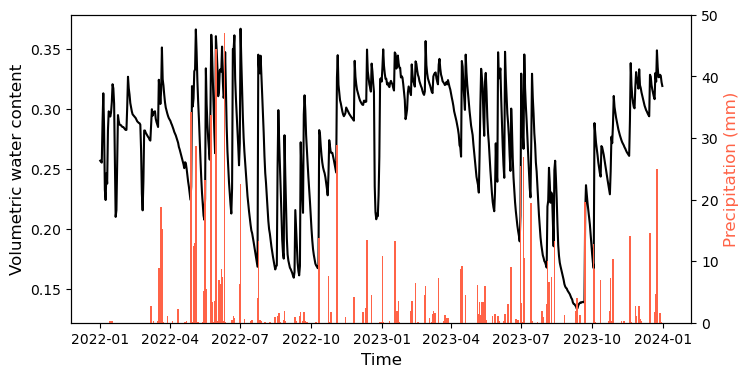

In [84]:
# Creating plot with secondary y-axis
plt.figure(figsize=(8,4))

plt.plot(df["datetime"], df["vwc_5cm"], '-k')
plt.xlabel('Time', size=12)
plt.ylabel('Volumetric water content', color='k', size=12)

plt.twinx()

plt.bar(df["datetime"], df["prcp"], width=2, color='tomato', linestyle='-')
plt.ylabel('Precipitation (mm)', color='tomato', size=12)
plt.ylim([0, 50])

plt.show()

#### Object-based syntax
```python
# Creating plot with secondary y-axis
fig, ax = plt.subplots(figsize=(8,4), facecolor='w')

ax.plot(df["datetime"], df["vwc_5cm"], '-k')
ax.set_xlabel('Time', size=12)
ax.set_ylabel('Volumetric water content', color='k', size=12)

ax2 = ax.twinx()

ax2.bar(df["datetime"], df["prcp"], width=2, color='tomato', linestyle='-')
ax2.set_ylabel('Precipitation (mm)', color='tomato', size=12)
ax2.set_ylim([0, 50])

plt.show()
```

<a name="matplotlib_styles"></a>
### Themes

In addition to the default style, Matplotlib also offers a variery of pre-defined themes. To see some examples visit the following websites:

Gallery 1 at: https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html

Gallery 2 at: https://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html



In [81]:
# Run this line to see all the styling themes available
print(plt.style.available)


['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


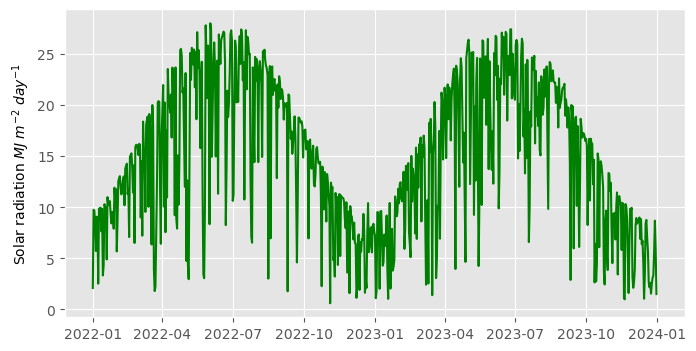

In [85]:
# Change plot defaults to ggplot style (similar to ggplot R language library)
# Use plt.style.use('default') to revert style

plt.style.use('ggplot') # Use plt.style.use('default') to revert.

plt.figure(figsize=(8,4))
plt.plot(df["datetime"], df["srad"], '-g')
plt.ylabel("Solar radiation $MJ \ m^{-2} \ day^{-1}$")

plt.show()

## Bokeh module

The [Bokeh](https://bokeh.pydata.org/en/latest/index.html) plotting library was designed for creating interactive visualizations for modern web browsers. Compared to Matplotlib, which excels in creating static plots, Bokeh emphasizes interactivity, offering tools to create dynamic and interactive graphics. Additionally, Bokeh integrates well with the Pandas library and provides a consistent and standardized syntax. This focus on interactivity and ease of use makes Bokeh well suited for web-based data visualizations and applications.

Unlike Matplotlib, where you typically import the entire library with a single command, Bokeh is organized into various sub-modules catered to different functionalities. This structure means that you import specific components from their respective modules, which aligns with the functionality you intend to use. While this might require a bit more upfront learning about the library, it also means that you are only importing what you need.

In [88]:
# Import Bokeh modules
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool

# Initialize the bokeh for the notebook
# If everything went correct you should see the Bokeh icon displaying below.
output_notebook() 

Loading BokehJS ...

## Interactive line plot

In [89]:
# Create figure
p = figure(plot_width=800, plot_height=400, title='Kings Creek', x_axis_type='datetime')

# Add line to the figure
p.line(df['datetime'], df['tmin'], line_color='blue', line_width=2, legend_label='Tmin')

# Add another line. In this case I used a different, but equivalent, syntax
# This syntax leverages the dataframe and its column names
p.line(source=df, x='datetime', y='tmax', line_color='tomato', line_width=2, legend_label='Tmax')

# Customize figure properties
p.xaxis.axis_label = 'Time'
p.yaxis.axis_label = 'Air Temperature (Celsius)'

# Set the font size of the x-axis and y-axis labels
p.yaxis.axis_label_text_font_size = '12pt' # Defined as a string using points simialr to Word
p.xaxis.axis_label_text_font_size = '12pt'

# Set up the size of the labels in the major ticks
p.xaxis.major_label_text_font_size = '12pt'
p.yaxis.major_label_text_font_size = '12pt'

# Add legend
p.legend.location = "top_left"
p.legend.title = "Legend"
p.legend.label_text_font_style = "italic"
p.legend.label_text_color = "black"
p.legend.border_line_width = 1
p.legend.border_line_color = "navy"
p.legend.border_line_alpha = 0.8
p.legend.background_fill_color = "white"
p.legend.background_fill_alpha = 0.9

# Hover tool for interactive tooltips on mouse hover over the plot
p.add_tools(HoverTool(tooltips=[("Date:", "$x{%F}"),("Temperature:","$y{%0.1f} Celsius")],
                       formatters={'$x':'datetime', '$y':'printf'},
                       mode='mouse'))
# Display figure
show(p)


## Seaborn module

Seaborn is a plotting library based on Matplotlib, specifically tailored for statistical data visualization. It stands out in scientific research for its ability to create informative and attractive statistical graphics with ease. Seaborn integrates well with Pandas DataFrames and its default styles and color palettes are designed to be aesthetically pleasing and ready for publication. Seaborn offers complex visualizations like heatmaps, violin plots, boxplots, and matrix scatter plots.

In [92]:
# Import Seaborn module
import seaborn as sns
sns.set_theme(style="ticks")


### Line plot

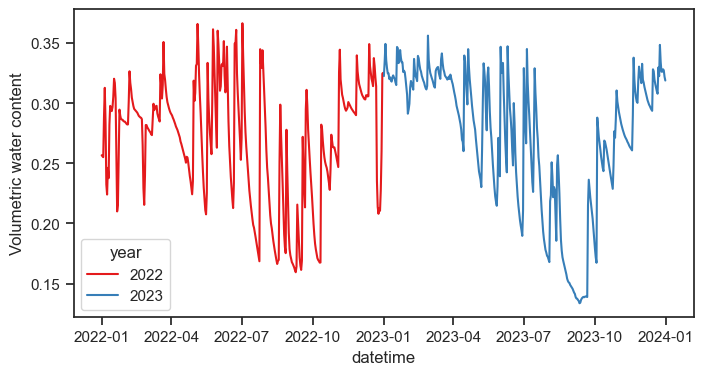

In [172]:
# Basic line plot
df_subset = df[['datetime', 'vwc_5cm', 'vwc_20cm', 'vwc_40cm']].copy()
df_subset['year'] = df_subset['datetime'].dt.year

plt.figure(figsize=(8,4))
sns.lineplot(data=df_subset, x='datetime', y='vwc_5cm', hue='year', palette='Set1')
plt.ylabel('Volumetric water content')
plt.show()


### Correlation matrix

<Axes: >

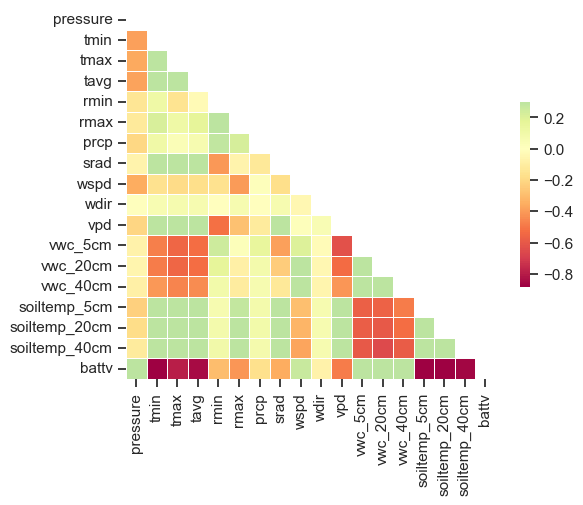

In [141]:
# Compute the correlation matrix
corr = df.corr(numeric_only=True)

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Spectral', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


### Scatterplot matrix

<Figure size 800x600 with 0 Axes>

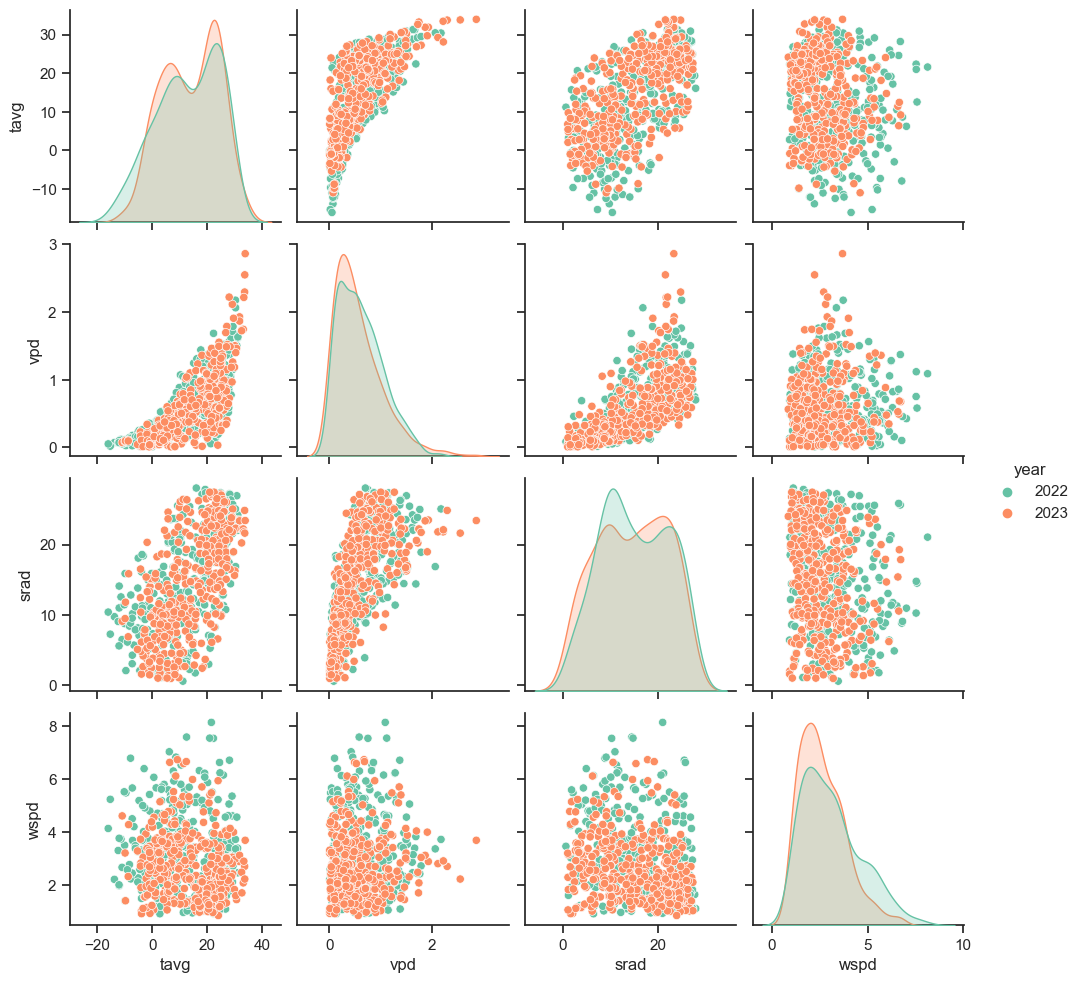

In [137]:
# Create subset of main dataframe
df_subset = df[['datetime','tavg', 'vpd', 'srad', 'wspd']].copy()
df_subset['year'] = df_subset['datetime'].dt.year

plt.figure(figsize=(8,6))
sns.pairplot(df_subset, hue="year", palette="Set2")
plt.show()


### Heatmap

Visualization of air and soil temperature at 5, 20, and 40 cm depths on a weekly basis.

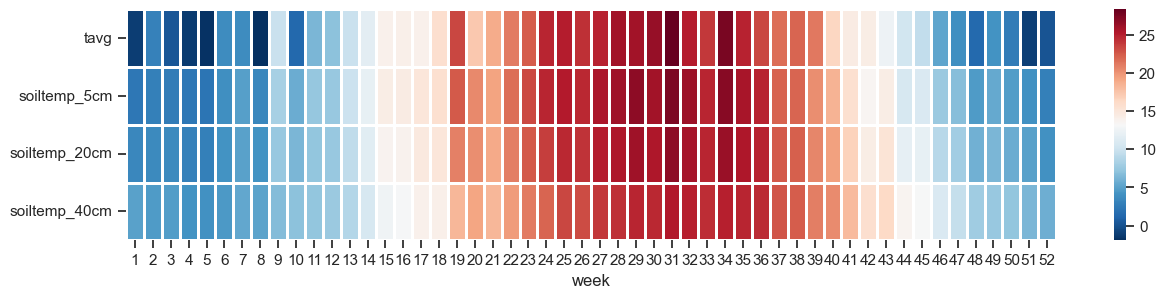

In [123]:
# Summarize data by month
df_subset = df[['datetime', 'tavg', 'soiltemp_5cm', 'soiltemp_20cm', 'soiltemp_40cm']].copy()
df_subset['week'] = df['datetime'].dt.isocalendar().week

# Average the values for both years on a weekly basis
df_subset = df_subset.groupby(["week"]).mean(numeric_only=True).round(2)
    
# Create Heatmap
plt.figure(figsize=(15,3))
sns.heatmap(df_subset.T, annot=False, linewidths=1, cmap="RdBu_r")
plt.show()
    

### Boxplot

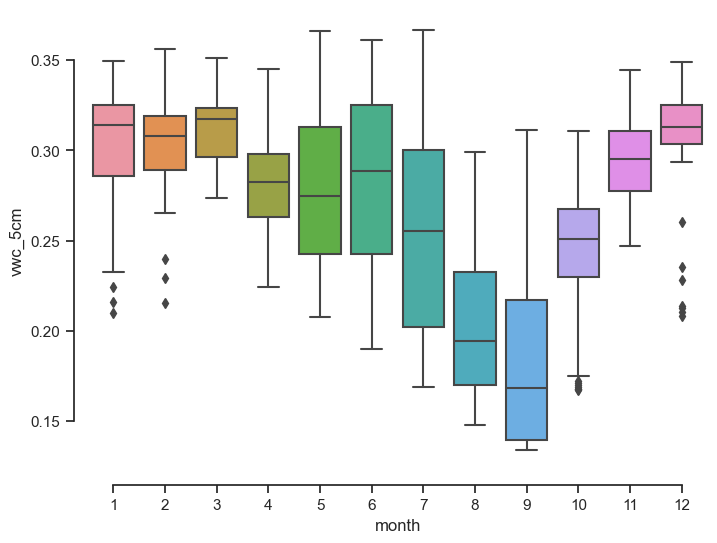

In [138]:
# Summarize data by month
df_subset = df[['datetime', 'vwc_5cm']].copy()
df_subset['month'] = df['datetime'].dt.month

# Draw a nested boxplot to show bills by day and time
plt.figure(figsize=(8,6))
sns.boxplot(data=df_subset, x="month", y="vwc_5cm")
sns.despine(offset=10, trim=True)
plt.show()
